In [44]:
import numpy as np
from scipy.optimize import fsolve

# %matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
# print(plt.style.available)  # show available template
plt.style.use(['seaborn-ticks','seaborn-paper'])  # use a templet

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'
params = {
    'figure.figsize': [8, 6], # Note! figure unit is inch!  scale fontz size 2.54 to looks like unit cm
    'axes.labelsize': 7*2.54, # scale 2.54 to change to figure unit looks as cm
    'font.size':  7*2.54,
    'lines.linewidth':2,
    'legend.fontsize': 7*2.54,
    'xtick.labelsize': 6*2.54,
    'ytick.labelsize': 6*2.54,
    'text.usetex': False,  
    'xtick.direction': "in",
    'ytick.direction': "in", # ticket inside
    'legend.frameon' : True, 
    'legend.edgecolor': 'black',
    'legend.shadow': True,
    'legend.framealpha':1,
#     'patch.linewidth' : 0.5, 
}
mpl.rcParams.update(params)

# 利用符号系统计算定积分

In [1]:
from sympy import *
init_printing()

In [2]:
T0,T1,T2,T3,v,t1,t2, u,t,phi = symbols('T0,T1,T2,T3,v,t1,t2,u,tau,phi',real=True,positive=True)

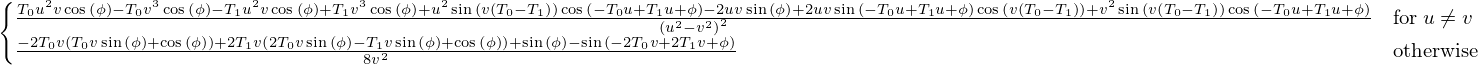

In [3]:
# Geometric phase 函数， 积分矩阵的对角， 其中phi=phi1-phi2， 是相位分段函数构造的矩阵

A = integrate(cos(u*(t2-t1)+phi)*sin(v*(t2-t1)),(t1,T0,t2))
A = simplify(A)
A = integrate(A,(t2,T0,T1))

simplify(A)

In [5]:
print(python(simplify(A)))

T0 = Symbol('T0')
u = Symbol('u')
v = Symbol('v')
phi = Symbol('phi')
T1 = Symbol('T1')
e = Piecewise(((T0*u**2*v*cos(phi) - T0*v**3*cos(phi) - T1*u**2*v*cos(phi) + T1*v**3*cos(phi) + u**2*sin(v*(T0 - T1))*cos(-T0*u + T1*u + phi) - 2*u*v*sin(phi) + 2*u*v*sin(-T0*u + T1*u + phi)*cos(v*(T0 - T1)) + v**2*sin(v*(T0 - T1))*cos(-T0*u + T1*u + phi))/(u**2 - v**2)**2, Ne(u, v)), ((-2*T0*v*(T0*v*sin(phi) + cos(phi)) + 2*T1*v*(2*T0*v*sin(phi) - T1*v*sin(phi) + cos(phi)) + sin(phi) - sin(-2*T0*v + 2*T1*v + phi))/(8*v**2), true))


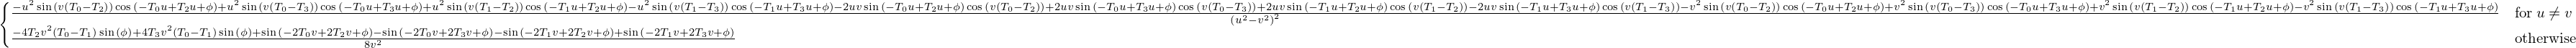

In [6]:
#  Geometric phase 函数， 积分矩阵的Fei对角， 其中phi=phi1-phi2， 是相位分段函数构造的矩阵

A = integrate(cos(u*(t2-t1)+phi)*sin(v*(t2-t1)),(t1,T0,T1))
A = simplify(A)
A = integrate(A,(t2,T2,T3))

simplify(A)

In [7]:
print(python(simplify(A)))

u = Symbol('u')
v = Symbol('v')
T0 = Symbol('T0')
T2 = Symbol('T2')
phi = Symbol('phi')
T3 = Symbol('T3')
T1 = Symbol('T1')
e = Piecewise(((-u**2*sin(v*(T0 - T2))*cos(-T0*u + T2*u + phi) + u**2*sin(v*(T0 - T3))*cos(-T0*u + T3*u + phi) + u**2*sin(v*(T1 - T2))*cos(-T1*u + T2*u + phi) - u**2*sin(v*(T1 - T3))*cos(-T1*u + T3*u + phi) - 2*u*v*sin(-T0*u + T2*u + phi)*cos(v*(T0 - T2)) + 2*u*v*sin(-T0*u + T3*u + phi)*cos(v*(T0 - T3)) + 2*u*v*sin(-T1*u + T2*u + phi)*cos(v*(T1 - T2)) - 2*u*v*sin(-T1*u + T3*u + phi)*cos(v*(T1 - T3)) - v**2*sin(v*(T0 - T2))*cos(-T0*u + T2*u + phi) + v**2*sin(v*(T0 - T3))*cos(-T0*u + T3*u + phi) + v**2*sin(v*(T1 - T2))*cos(-T1*u + T2*u + phi) - v**2*sin(v*(T1 - T3))*cos(-T1*u + T3*u + phi))/(u**2 - v**2)**2, Ne(u, v)), ((-4*T2*v**2*(T0 - T1)*sin(phi) + 4*T3*v**2*(T0 - T1)*sin(phi) + sin(-2*T0*v + 2*T2*v + phi) - sin(-2*T0*v + 2*T3*v + phi) - sin(-2*T1*v + 2*T2*v + phi) + sin(-2*T1*v + 2*T3*v + phi))/(8*v**2), true))


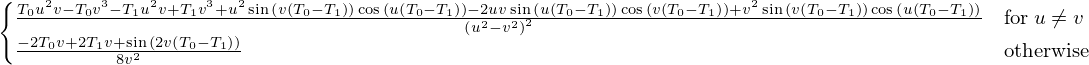

In [20]:
#  Geometric phase 函数， 积分矩阵的对角， 其中phi=phi1-phi1=0， 是相位分段函数构造的矩阵

A = integrate(cos(u*(t2-t1))*sin(v*(t2-t1)),(t1,T0,t2))
A = simplify(A)
A = integrate(A,(t2,T0,T1))

simplify(A)

In [21]:
print(python(simplify(A)))

T0 = Symbol('T0')
u = Symbol('u')
v = Symbol('v')
T1 = Symbol('T1')
e = Piecewise(((T0*u**2*v - T0*v**3 - T1*u**2*v + T1*v**3 + u**2*sin(v*(T0 - T1))*cos(u*(T0 - T1)) - 2*u*v*sin(u*(T0 - T1))*cos(v*(T0 - T1)) + v**2*sin(v*(T0 - T1))*cos(u*(T0 - T1)))/(u**2 - v**2)**2, Ne(u, v)), ((-2*T0*v + 2*T1*v + sin(2*v*(T0 - T1)))/(8*v**2), true))


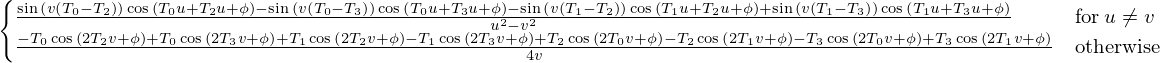

In [9]:
#  Rubusty 函数， 积分矩阵的非对角， 其中phi=phi1+phi2， 是相位分段函数构造的矩阵
#  实部： 设置 phi=phi即可
#  虚部： 这只 phi = phi + pi/2 即可


A = integrate(cos(u*(t2+t1)+phi)*sin(v*(t2-t1)),(t1,T0,T1))
A = simplify(A)
A = integrate(A,(t2,T2,T3))

simplify(A)

In [10]:
print(python(simplify(A)))

v = Symbol('v')
T0 = Symbol('T0')
T2 = Symbol('T2')
u = Symbol('u')
phi = Symbol('phi')
T3 = Symbol('T3')
T1 = Symbol('T1')
e = Piecewise(((sin(v*(T0 - T2))*cos(T0*u + T2*u + phi) - sin(v*(T0 - T3))*cos(T0*u + T3*u + phi) - sin(v*(T1 - T2))*cos(T1*u + T2*u + phi) + sin(v*(T1 - T3))*cos(T1*u + T3*u + phi))/(u**2 - v**2), Ne(u, v)), ((-T0*cos(2*T2*v + phi) + T0*cos(2*T3*v + phi) + T1*cos(2*T2*v + phi) - T1*cos(2*T3*v + phi) + T2*cos(2*T0*v + phi) - T2*cos(2*T1*v + phi) - T3*cos(2*T0*v + phi) + T3*cos(2*T1*v + phi))/(4*v), true))


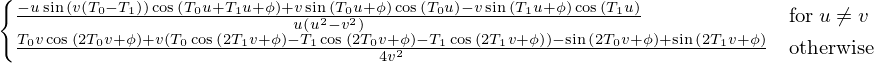

In [12]:
#  Rubusty 函数， 积分矩阵的对角， 其中phi=phi1+phi2， 是相位分段函数构造的矩阵
#  实部： 设置 phi=phi即可
#  虚部： 这只 phi = phi + pi/2 即可, 因为  cos(theta+pi/2)=-sin(theta)

A = integrate(cos(u*(t2+t1)+phi)*sin(v*(t2-t1)),(t1,T0,t2))
A = simplify(A)
A = integrate(A,(t2,T0,T1))

simplify(A)

In [13]:
print(python(simplify(A)))

u = Symbol('u')
v = Symbol('v')
T0 = Symbol('T0')
T1 = Symbol('T1')
phi = Symbol('phi')
e = Piecewise(((-u*sin(v*(T0 - T1))*cos(T0*u + T1*u + phi) + v*sin(T0*u + phi)*cos(T0*u) - v*sin(T1*u + phi)*cos(T1*u))/(u*(u**2 - v**2)), Ne(u, v)), ((T0*v*cos(2*T0*v + phi) + v*(T0*cos(2*T1*v + phi) - T1*cos(2*T0*v + phi) - T1*cos(2*T1*v + phi)) - sin(2*T0*v + phi) + sin(2*T1*v + phi))/(4*v**2), true))


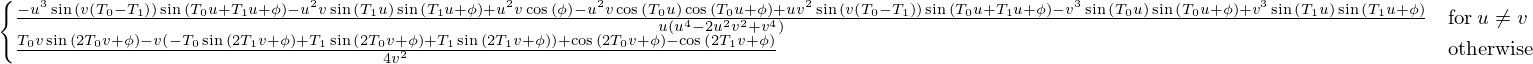

In [14]:
#  Rubusty 函数image part， 积分矩阵的对角， 其中phi=phi1+phi1=2phi1

A = integrate(sin(u*(t2+t1)+phi)*sin(v*(t2-t1)),(t1,T0,t2))
A = simplify(A)
A = integrate(A,(t2,T0,T1))

simplify(A)

In [15]:
print(python(simplify(A)))

u = Symbol('u')
v = Symbol('v')
T0 = Symbol('T0')
T1 = Symbol('T1')
phi = Symbol('phi')
e = Piecewise(((-u**3*sin(v*(T0 - T1))*sin(T0*u + T1*u + phi) - u**2*v*sin(T1*u)*sin(T1*u + phi) + u**2*v*cos(phi) - u**2*v*cos(T0*u)*cos(T0*u + phi) + u*v**2*sin(v*(T0 - T1))*sin(T0*u + T1*u + phi) - v**3*sin(T0*u)*sin(T0*u + phi) + v**3*sin(T1*u)*sin(T1*u + phi))/(u*(u**4 - 2*u**2*v**2 + v**4)), Ne(u, v)), ((T0*v*sin(2*T0*v + phi) - v*(-T0*sin(2*T1*v + phi) + T1*sin(2*T0*v + phi) + T1*sin(2*T1*v + phi)) + cos(2*T0*v + phi) - cos(2*T1*v + phi))/(4*v**2), true))


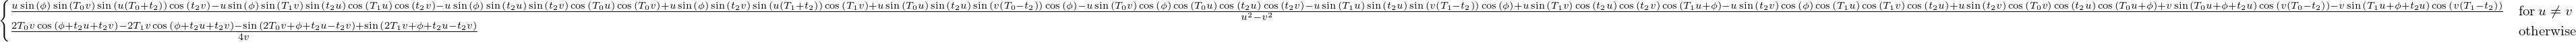

In [32]:
A = trigsimp(A)
A

In [ ]:
print(python(A))

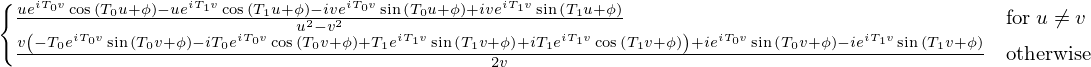

In [37]:
## 计算 alpha 

A = integrate(sin(u*t+phi)*exp(I*v*t),(t,T0,T1))

A=simplify(A)

In [40]:
A=simplify(A)
print(python(A))

u = Symbol('u')
T0 = Symbol('T0')
v = Symbol('v')
phi = Symbol('phi')
T1 = Symbol('T1')
e = Piecewise(((u*exp(I*T0*v)*cos(T0*u + phi) - u*exp(I*T1*v)*cos(T1*u + phi) - I*v*exp(I*T0*v)*sin(T0*u + phi) + I*v*exp(I*T1*v)*sin(T1*u + phi))/(u**2 - v**2), Ne(u, v)), ((-v*(T0*exp(I*T0*v)*sin(T0*v + phi) + I*T0*exp(I*T0*v)*cos(T0*v + phi) - T1*exp(I*T1*v)*sin(T1*v + phi) - I*T1*exp(I*T1*v)*cos(T1*v + phi)) + I*exp(I*T0*v)*sin(T0*v + phi) - I*exp(I*T1*v)*sin(T1*v + phi))/(2*v), true))


其他函数积分

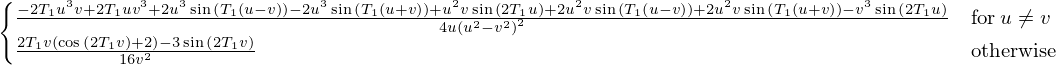

In [10]:
A = integrate(sin(u*t1)*sin(u*t2)*sin(v*(t2-t1)),(t1,0,t2))
A = simplify(A)
B = integrate(A,(t2,0,T1))

simplify(simplify(B))

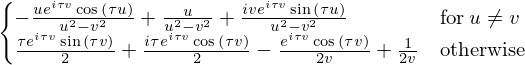

In [15]:
A = integrate(sin(u*t1)*exp(I*v*t1),(t1,0,t))
A

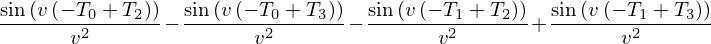

In [48]:
A = integrate(sin(v*(t2-t1)),(t1,T0,T1))
integrate(A,(t2,T2,T3))

# 优化类整合

## 定义类

In [146]:
class IonChain:
    positions0=None # ion ballance postions on the chain, has been normed with lattice_d
    lattice_d = None # lattice distance, um
    N = None  # ion number of the chain
    DipoleList = None  # DipoleList on the chain
    b=None      # ratial / axis paramter
    Omega_SDF=None
    C_eta = 462.391277099127  # eta = C_eta/sqrt(omega), get from 171Yb Raman excitaion @ 369nm, 
    
    def __init__(self,N,beta,v0,DipoleList=None):
        self.lattice_d=1.0
        self.N=N
        self.beta=beta
        self.v0 = v0  # v0 is the basic frequency
        self.DipoleList=DipoleList
        
        self.mode_x()
        self.mode_z()
        
    def get_ion_pos(self):
        def position(x):
            # list 长度为离子数目, x list 是每个离子的位置初值，通过迭代法求解 x0 。
            n = len(x)
            e = np.zeros(n) #n个平衡方程
            for i in range(1,n-1):
                for j in range(0,i):
                    e[i] = e[i] - 1/(x[i]-x[j])**2
                for k in range(i+1,n):
                    e[i] = e[i] + 1/(x[i]-x[k])**2
                e[i] = e[i] + x[i]
            for i in range(1,n):
                e[0] = e[0] + 1/(x[0]-x[i])**2
            e[0] = e[0] + x[0]
            for i in range(0,n-1):
                e[n-1] = e[n-1] - 1/(x[n-1]-x[i])**2
            e[n-1] = e[n-1] + x[n-1]
            return(np.array(e))

        x0 = np.arange(self.N)  # 数值运算的初始值。 list 长度为离子数目
        result = fsolve(position, x0)
        self.positions0 = result
        return result

    # 求解径向频率分布的改变, 注意 sqrt(f2) 是频率分布
    def mode_x(self):
        #  n 为离子数
        #  b为trap参数， w_x/w_z的数值
        # DipoleList，形式为[(i,b_i),(j,b_j),....] 分别在 i个离子上施加b_i 的局域势...
        # DipoleList 为None时， 为普通阱
        n = self.N
        A = np.zeros((n,n)) #展开矩阵
        u = self.get_ion_pos()
        for i in range(0,n):
            A[i][i] =  self.beta**2
            for j in range(0,n):
                if i != j:
                    A[i][j]  =  1/abs(u[i]-u[j])**3
                    A[i][i] += -1/abs(u[i]-u[j])**3
        if self.DipoleList is not None:
            for k, b1 in DipoleList:
                A[k][k] = A[k][k] + b1**2
        a,b = np.linalg.eig(A)
        self.a_x,self.V_x = self.arangeEig(a,b)
        self.vs_x = np.sqrt(self.a_x)*self.v0
        self.eta_x = self.C_eta/np.sqrt(self.vs_x)
        self.g_x = self.eta_x * self.V_x 
        
        return self.a_x,self.V_x 

    # 求轴向的频率分布
    def mode_z(self):
        #  n 为离子数
        #  b为trap参数， w_x/w_z的数值
        # DipoleList，形式为[(i,b_i),(j,b_j),....] 分别在 i个离子上施加b_i 的局域势...
        # DipoleList 为None时， 为普通阱
        n = self.N
        A = np.zeros((n,n)) #展开矩阵
        u = self.get_ion_pos()
        for i in range(0,n):
            A[i][i] = 1      # 对角项初始值， 便于后续积分
            for j in range(0,n):
                if i != j:
                    A[i][j]  =   -2/abs(u[i]-u[j])**3  # 非对角项
                    A[i][i] +=  2/abs(u[i]-u[j])**3  # 对角项需要积分， p=j

        if DipoleList is not None:
            for k, b1 in DipoleList:
                A[k][k] = A[k][k] + b1**2
        #注意 sqrt(a) 是频率分布
        a,b = np.linalg.eig(A)
        self.a_z,self.V_z = self.arangeEig(a,b)
        self.vs_z = np.sqrt(self.a_z)*self.v0
        self.eta_z = self.C_eta/np.sqrt(self.vs_z)
        self.g_z =  self.eta_z * self.V_z
        return self.a_z,self.V_z
    
    def resortEig(self, M, indexM):
        # resort matrix eigs with index matrix or index vectors indexM[:,i]
        m,n = M.shape
        index = []
        for i in range(n):
            p = [np.abs(np.dot(M[:,j],indexM[:,i]))/np.linalg.norm(M[:,j])/np.linalg.norm(indexM[:,i]) for j in range(n)]
            index.append(np.argmax(p))
        return np.array(index)


    def arangeEig(self,a,V):
        index = np.argsort(a)
        return (a[index], V[:,index])




from sympy import *
from scipy.integrate  import simps, cumtrapz

T0,T1,T2,T3,v,t1,t2, u,t,phi = symbols('T0,T1,T2,T3,v,t1,t2,u,tau,phi',real=True,positive=True)

# 非对角项的表达式
e0_phase = Piecewise(((-u**2*sin(v*(T0 - T2))*cos(-T0*u + T2*u + phi) + u**2*sin(v*(T0 - T3))*cos(-T0*u + T3*u + phi) + u**2*sin(v*(T1 - T2))*cos(-T1*u + T2*u + phi) - u**2*sin(v*(T1 - T3))*cos(-T1*u + T3*u + phi) - 2*u*v*sin(-T0*u + T2*u + phi)*cos(v*(T0 - T2)) + 2*u*v*sin(-T0*u + T3*u + phi)*cos(v*(T0 - T3)) + 2*u*v*sin(-T1*u + T2*u + phi)*cos(v*(T1 - T2)) - 2*u*v*sin(-T1*u + T3*u + phi)*cos(v*(T1 - T3)) - v**2*sin(v*(T0 - T2))*cos(-T0*u + T2*u + phi) + v**2*sin(v*(T0 - T3))*cos(-T0*u + T3*u + phi) + v**2*sin(v*(T1 - T2))*cos(-T1*u + T2*u + phi) - v**2*sin(v*(T1 - T3))*cos(-T1*u + T3*u + phi))/(u**2 - v**2)**2, Ne(u, v)), ((-4*T2*v**2*(T0 - T1)*sin(phi) + 4*T3*v**2*(T0 - T1)*sin(phi) + sin(-2*T0*v + 2*T2*v + phi) - sin(-2*T0*v + 2*T3*v + phi) - sin(-2*T1*v + 2*T2*v + phi) + sin(-2*T1*v + 2*T3*v + phi))/(8*v**2), true))
e0_robust = Piecewise(((sin(v*(T0 - T2))*cos(T0*u + T2*u + phi) - sin(v*(T0 - T3))*cos(T0*u + T3*u + phi) - sin(v*(T1 - T2))*cos(T1*u + T2*u + phi) + sin(v*(T1 - T3))*cos(T1*u + T3*u + phi))/(u**2 - v**2), Ne(u, v)), ((-T0*cos(2*T2*v + phi) + T0*cos(2*T3*v + phi) + T1*cos(2*T2*v + phi) - T1*cos(2*T3*v + phi) + T2*cos(2*T0*v + phi) - T2*cos(2*T1*v + phi) - T3*cos(2*T0*v + phi) + T3*cos(2*T1*v + phi))/(4*v), true))    


# 对角项的表达式
#e1_phase = Piecewise(((T0*u**2*v*cos(phi) - T0*v**3*cos(phi) - T1*u**2*v*cos(phi) + T1*v**3*cos(phi) + u**2*sin(v*(T0 - T1))*cos(-T0*u + T1*u + phi) - 2*u*v*sin(phi) + 2*u*v*sin(-T0*u + T1*u + phi)*cos(v*(T0 - T1)) + v**2*sin(v*(T0 - T1))*cos(-T0*u + T1*u + phi))/(u**2 - v**2)**2, Ne(u, v)), ((-2*T0*v*(T0*v*sin(phi) + cos(phi)) + 2*T1*v*(2*T0*v*sin(phi) - T1*v*sin(phi) + cos(phi)) + sin(phi) - sin(-2*T0*v + 2*T1*v + phi))/(8*v**2), true))
e1_phase = Piecewise(((T0*u**2*v - T0*v**3 - T1*u**2*v + T1*v**3 + u**2*sin(v*(T0 - T1))*cos(u*(T0 - T1)) - 2*u*v*sin(u*(T0 - T1))*cos(v*(T0 - T1)) + v**2*sin(v*(T0 - T1))*cos(u*(T0 - T1)))/(u**2 - v**2)**2, Ne(u, v)), ((-2*T0*v + 2*T1*v + sin(2*v*(T0 - T1)))/(8*v**2), true))
e1_robust = Piecewise(((-u*sin(v*(T0 - T1))*cos(T0*u + T1*u + phi) + v*sin(T0*u + phi)*cos(T0*u) - v*sin(T1*u + phi)*cos(T1*u))/(u*(u**2 - v**2)), Ne(u, v)), ((T0*v*cos(2*T0*v + phi) + v*(T0*cos(2*T1*v + phi) - T1*cos(2*T0*v + phi) - T1*cos(2*T1*v + phi)) - sin(2*T0*v + phi) + sin(2*T1*v + phi))/(4*v**2), true))

# alpha_f 表达式
e_alpha_f = Piecewise(((u*exp(I*T0*v)*cos(T0*u + phi) - u*exp(I*T1*v)*cos(T1*u + phi) - I*v*exp(I*T0*v)*sin(T0*u + phi) + I*v*exp(I*T1*v)*sin(T1*u + phi))/(u**2 - v**2), Ne(u, v)), ((-v*(T0*exp(I*T0*v)*sin(T0*v + phi) + I*T0*exp(I*T0*v)*cos(T0*v + phi) - T1*exp(I*T1*v)*sin(T1*v + phi) - I*T1*exp(I*T1*v)*cos(T1*v + phi)) + I*exp(I*T0*v)*sin(T0*v + phi) - I*exp(I*T1*v)*sin(T1*v + phi))/(2*v), true))

f0_phase = lambdify((T0,T1,T2,T3,u,v,phi), e0_phase, 'numpy' )
f0_robust = lambdify((T0,T1,T2,T3,u,v,phi), e0_robust, 'numpy' )

f1_phase = lambdify((T0,T1,u,v), e1_phase, 'numpy' )
f1_robust = lambdify((T0,T1,u,v,phi), e1_robust, 'numpy' )

f_alpha_f = lambdify((T0,T1,u,v,phi), e_alpha_f, 'numpy' )


class Ion_Gate:
    N=None        #   N segments
    Ts = None     # Intervals list
    ts = None     # time list for intervals
    Amps = None   # amplitude list
    Phases = None   # phase list
    Ion_Chain_Setting = None
    def __init__(self,Ion_Chain_Setting,N=None):
        self.Ion_Chain_Setting = Ion_Chain_Setting
        self.N = N
        
    def setSegments(self,Ts,Amps,Phases):
        if len(Ts)!=len(Amps):
            raise ValueError('lens of Ts and Amps not equal')
        self.N = len(Ts)
        self.Ts = np.array(Ts)
        self.Amps = np.array(Amps)
        self.Phases = np.array(Phases)
        self.ts =  np.cumsum(np.concatenate(([0],Ts)))
        
    def setSemiSegments(self,Tss,Ampss,Phasess):  # set harf of the Amps list, and let waveform symmetri 
        Ts = np.concatenate((Tss,Tss[::-1][1:]))
        Amps = np.concatenate((Ampss,Ampss[::-1][1:]))
        Phases = np.concatenate((Phasess,Phasess[::-1][1:]))
        self.setSegments(Ts,Amps,Phases)


    def Geometry_Phase(self,u, vm):  # Geometry_phase part, the exact may need time some coffiecient
        t = self.ts
        t_i1,t_k = np.meshgrid(t[:-1],t[1:])
        t_i,t_k1 = np.meshgrid(t[1:],t[:-1])
        
        A_i,A_k = np.meshgrid(self.Amps,self.Amps)
        
        Phi_i,Phi_k = np.meshgrid(self.Phases,self.Phases)
        Phi = Phi_k-Phi_i  # need to check A-B or B-A
        
        M_phase = f0_phase(t_i1,t_i,t_k1,t_k,u,vm,Phi)
        phase_diag =  f1_phase(t[:-1],t[1:],u,vm)
        np.fill_diagonal(M_phase, phase_diag)
        
        M = A_k*A_i*M_phase
        G_phase = np.sum(np.tril(M))
        return G_phase


    def Robusty(self,u,vm):  # Raman u laser detune, vm: phonon freqency
        t = self.ts
        t_i1,t_k = np.meshgrid(t[:-1],t[1:])
        t_i,t_k1 = np.meshgrid(t[1:],t[:-1])

        A_i,A_k = np.meshgrid(self.Amps,self.Amps)
        
        Phi_i,Phi_k = np.meshgrid(self.Phases,self.Phases)
        Phi = Phi_k+Phi_i  # note, phi1+phi2

        M_real = f0_robust(t_i1,t_i,t_k1,t_k,u,vm,Phi)
        real_diag = f1_robust(t[:-1],t[1:],u,vm,2*self.Phases)
        np.fill_diagonal(M_real, real_diag)

        M_imag = f0_robust(t_i1,t_i,t_k1,t_k,u,vm,Phi+np.pi/2)
        imag_diag = f1_robust(t[:-1],t[1:],u,vm,2*self.Phases++np.pi/2) # phi+phi=2*phi
        np.fill_diagonal(M_imag, imag_diag)

        imag = np.sum(np.tril(A_k*A_i*M_real))
        real = np.sum(np.tril(A_k*A_i*M_imag))

        return np.sqrt(imag**2+real**2)


    def Alpha_f(self,u,v,phi=0):
        t = self.ts
        return np.sum(self.Amps*f_alpha_f(t[:-1],t[1:],u,v,self.Phases+phi))


    def f_modulation(self,N=1000):   # modulation function
    # return time , Amplitude line, phase line
        t = self.ts
        g = self.Amps
        tl = np.linspace(0,t[-1],N+1)
        gl = np.zeros(len(tl))
        pl = np.zeros(len(tl))

        for i, ti0,ti in zip(range(len(t)-1),t[:-1],t[1:]):
            index =np.logical_and(ti0<=tl,tl<=ti)
            gl[index]=g[i]
            pl[index]=self.Phases[i]
        return tl,gl, pl

    def f_alpha_x(self,u,ion_i,ion_j,mode_index,phi0=0,N=10000):
        t = self.ts
        g = self.Amps
        tl,fg,phase = self.f_modulation(N)
        dt = tl[1]-tl[0]
        v = self.Ion_Chain_Setting.vs_x[mode_index]
        g_x = self.Ion_Chain_Setting.g_x
        omega =  self.Ion_Chain_Setting.Omega_SDF*(np.abs(g_x[ion_i,mode_index])+np.abs(g_x[ion_i,mode_index]))
        # can not determin the spin of  ion_i and ion_j, so we use the abs() + abs()

        kernal = 1.0j*omega*fg*np.sin(u*tl+phi0+phase)*np.exp(1.0j*v*tl)
        trace = cumtrapz(kernal,dx=dt)
        trace = np.concatenate(([0],trace))
        pieces = []
        for ti0,ti in zip(t[:-1],t[1:]):
            a = int(ti0/dt)
            b = int(ti/dt)
            pieces.append(trace[a:b])
        return pieces
    
    def optimize_value(self,u,i,j):  # g is the modulation amplitude, on i, j th ion
        dR_list=[]
        dalpha_list=[]
        G_phase_list=[]
        Omega_SDF = self.Ion_Chain_Setting.Omega_SDF
        g_i,g_j = self.Ion_Chain_Setting.g_x[i],self.Ion_Chain_Setting.g_x[j]
        for m,vm in enumerate(self.Ion_Chain_Setting.vs_x):
            g_mi,g_mj = g_i[m], g_j[m]
            R = g_mi*g_mj*Omega_SDF**2*self.Robusty(u,vm)
            dalpha1 = (np.abs(g_mi)+np.abs(g_mj))*Omega_SDF*np.abs(self.Alpha_f(u,vm))
            dalpha2 = (np.abs(g_mi)+np.abs(g_mj))*Omega_SDF*np.abs(self.Alpha_f(u,vm,np.pi/2))
            Gphase  = g_mi*g_mj*Omega_SDF**2*self.Geometry_Phase(u,vm)
            
            G_phase_list.append(Gphase)
            dR_list.append(R**2)                       # note
            dalpha_list.append(dalpha1**2+dalpha2**2)  # note
            
        self.dR2 = dR_list
        self.dalpha2 = dalpha_list
        self.G_phase = G_phase_list
        S1 = np.sum(np.array(dR_list))
        S2 = np.sum(np.array(dalpha_list))
        phase_error = np.abs(np.abs(np.sum(G_phase_list))-np.pi/4)
        #print(S1,S2,phase_error)
        return S1+S2+phase_error     # proportional to fidelity


def plot_traces(traces):
    m = []
    for trace in traces:
        x,y = np.real(trace),np.imag(trace)
        m.append(np.max(x))
        m.append(np.max(y))
        plt.plot(x,y)
    return np.max(m)    

# 强度优化

## 11 离子

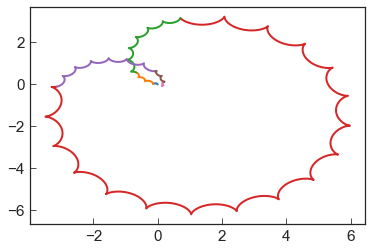

In [121]:
# dipole on the ion_i and ion_j, then calcaulate the phase gate of the two ions

N_ions = 11
dipole_strenth = 20
ion_i = 5
ion_j = 4
v0 = 2*np.pi*200e3    # v_z = 200Kz
beta=10.0

DipoleList = [(ion_i, dipole_strenth),(ion_j,dipole_strenth)] # dipole laser on the ion_i and ion_j
IonChainSetting = IonChain(N_ions,beta,v0,DipoleList)
IonChainSetting.Omega_SDF =  70e6 *2 *np.pi # SDF induced Rabi


ion_amps = Ion_Gate(IonChainSetting)


delta = 2*np.pi*0.5e6    # drive detuning
u0= np.average(IonChainSetting.vs_x[-2:])+ delta
T0 = np.array([0.08,0.2,0.5,1.3])*2*np.pi/delta/1.5 #
A0 = np.array([0.05,0.1,0.2,0.5])
phases0 = np.zeros(len(A0))

N_Semi = len(T0)   # total segments is 2*N_semi-1

ion_amps.setSemiSegments(T0,A0,phases0)

# plt.plot(*ion_amps.f_modulation())
plot_traces(ion_amps.f_alpha_x(u0,ion_i,ion_j,-1))

# IonChainSetting.vs_x/np.pi/2/1e6

###  优化

In [122]:
def cal(x):
    u = x[0]
    Tss = x[1:1+N_Semi]
    Ampss = x[1+N_Semi:1+2*N_Semi]
    phases0 = np.zeros(len(Ampss))
    ion_amps.setSemiSegments(Tss,Ampss,phases0)
    return ion_amps.optimize_value(u,ion_i,ion_j) # Raman laser also on the ion_i and ion_j

p0 = np.concatenate(([u0],T0, A0))
result = minimize(cal,p0,method = 'Nelder-Mead',tol=1e-5,
                        options={'xtol': 1e-9,'disp': True,
                                'maxiter':10000})

0.047121621562431576 0.4894791221544249 7.256764520135474
0.006597732164068657 5.9817912840290255 2.4401819169790047
0.04638965263559775 0.46296449699215736 7.2577999504435455
0.041420843784873075 0.39282625358690537 7.258604585188505
0.1082353012387531 0.13026454881965283 7.22696970002792
0.29941153024378375 1.983380681196345 7.313579535227459
0.04664459068152537 0.46006539726261364 7.256861699663493
0.04514824832816665 0.38705772682214645 7.248605216809847
0.03718930257021992 1.191168152415113 7.1912015805306355
0.07453818358155319 0.3602265958198759 8.159374959191776
0.5462118924921866 0.33311013344618606 5.247691813180421
0.8863614561757251 0.9795237001098233 4.424355574366044
0.005988761426627598 0.39265929559113216 4.429117555196595
0.007709776812648596 0.14439256441150866 3.346152869869468
0.36766593372213197 364.46376820153023 26.311632756855087
0.5686874663658417 0.5398135726338376 3.6429206059230568
0.04808011782543797 0.02316277799414307 4.765650783399683
0.05566623170899304

0.0026697158780422513 0.42035362346981253 0.011146144340878017
0.005940409994306301 0.2801908709428084 0.15569898627270984
0.003394100629676917 0.4949978505730005 0.13831357597810534
0.00028955942056086803 0.25975881329792694 0.1965548964699808
0.0008780097618650413 0.22613510645973708 0.16189822582445412
0.0001639782616863444 0.2545482180000963 0.11484890017900451
0.00015767770782073928 0.36229892519420764 0.04428368761853374
0.0015577480010497361 0.5725306867475597 0.19108689642324972
0.008461824286726772 0.1917121983617137 0.2529486783276509
0.0006250058010941813 0.4089514988156424 0.04403373903955643
0.008481111304971336 0.2131533291980767 0.17689126832137614
0.003575424935400453 0.2330302306832923 0.06732806862120189
0.010054170396223559 0.21609351933039317 0.011282985696374759
0.007041166126651903 0.2745218319243551 0.19997584763920262
0.000680677255599795 0.2929663784316787 0.08938806997813753
0.00045909678978762894 0.44095021366578313 0.08637419618845055
0.003932451866487062 0.

0.00014558491984246916 0.025437199706890498 0.00333348919437082
0.00020128517698376125 0.02994649002283227 0.0011358218958479327
6.304763765476263e-05 0.02669754995264348 0.006215831565538288
7.303706129426324e-05 0.025961405856934232 0.0028020630218863474
0.0005180951700604062 0.02507216774364474 0.0023994238850990612
0.0017675703397892375 0.025987924752911777 0.004536957273288955
0.0016223427840791381 0.0316458066140982 0.0015398058102968903
7.186453750278344e-05 0.026473205273488842 0.00023318041974373926
0.000319725092082479 0.027131742480821196 0.0034333966184716402
7.495470313343003e-05 0.026146338912573872 0.001819383679012354
7.671524838436138e-05 0.02876392731234645 0.004317578465168559
0.0001332025206965204 0.025590445094864658 0.0019688492318730155
6.719153418483527e-05 0.027255863471302537 0.004873478997363456
0.00017723205887536697 0.025810104747227947 0.0017157214860317183
7.238823469005062e-05 0.026099777057078014 0.00353532949978419
0.00019184407994577753 0.026173832044

0.0014064006345722677 0.012304954107901039 0.00024216902117668582
0.00152855723809395 0.01254584747034012 0.0011635678203942845
0.0014446949688324 0.011512199535954172 0.0007359130550446125
0.0015517363576633386 0.01117195672798374 0.000980979464194398
0.0023602048088494816 0.011649269639321717 0.0005015767846385799
0.0013568399242032802 0.012351763410581768 0.0005020215725641819
0.001455273266914948 0.011321404677200627 0.0005112844308152731
0.0014375609609092923 0.011220618736361942 0.0007242360477599519
0.0009659849246313871 0.012610970260759895 3.438467576888371e-05
0.002532788604212501 0.011543757607170043 0.00011380804800342759
0.0015516460288014643 0.011719372897655489 0.0003827223804622193
0.0008242689391147862 0.012908128958591916 0.00027978519473936814
0.0014503354001105698 0.011526134970848832 0.0008441257626161658
0.0005371003920488588 0.013861640378188222 0.0002694990476941328
0.0018563461429156926 0.01145842159560493 0.000189208738285096
0.0014386623141226548 0.0116115968

0.0018252317445564858 0.010527797207567007 1.5214180383971154e-05
0.001791838515635673 0.010573155829911623 3.0731187078636424e-05
0.0018485631086028742 0.010503520520675843 1.4041107776030515e-05
0.00186495920625754 0.010485106148866118 1.915216951164922e-05
0.0019107329421138278 0.010438043081603338 7.935713603579586e-06
0.0019788299174130857 0.010377587924517335 1.733474576592897e-05
0.0018605201526354 0.010485937977846234 2.009095692745433e-05
0.0018469805186466905 0.010492843661247144 1.3647420074036631e-06
0.0018418585824346687 0.01049928061678276 1.6585861475348906e-06
0.001882234964740351 0.010459744603863477 2.7868652595408605e-05
0.0018338759350433162 0.01051838771949708 1.4253170520284186e-05
0.0018169637319270567 0.010537786264251463 2.6306141207577127e-05
0.0018659438497389193 0.010478330089080508 1.3952630935953891e-05
0.0018344236458394789 0.010513592643736549 2.7045129251668243e-05
0.0018573614654066946 0.010490452315692664 7.600104056315615e-06
0.0018817925374754842 0.

0.0020127109911751125 0.010303520799375925 2.341924012050356e-06
0.002014893898099203 0.010302166787432182 1.941428638296827e-06
0.0019782838970244868 0.010333324332823489 1.972950669504314e-06
0.0019826235593805334 0.010328153453700719 3.5376115770091587e-06
0.002030440368545444 0.010284930471700753 1.6226647856498744e-06
0.0020113431105573502 0.010299866822831752 1.0759101867208187e-06
0.001971259043286948 0.01033895451117712 3.012261169388353e-07
0.0019496987388904169 0.010359987024043288 5.772199047626714e-07
0.001958565875575585 0.010352600366829957 3.0701376827479976e-06
0.0019714128157289454 0.010332145859096892 2.8694084308611423e-06
0.0019606977887588715 0.010335662580785165 4.0792911830678236e-06
0.0019193083648333504 0.010391836479275697 2.5411765269822695e-06
0.0019625465672240498 0.010339154392112157 2.455713759452749e-06
0.0019294658897663474 0.010372499384001713 2.544876601895396e-06
0.0019342126724655538 0.010367406280364103 5.511610146058388e-07
0.0019522605923485436 0

0.00019628892822235618 0.011131173974437865 1.4060043365127228e-05
0.00019735141217825546 0.011175840484518397 3.559100937611248e-05
0.00022238701017475925 0.011120365260257573 3.0275808091673184e-06
0.00017628812739611078 0.011171754996826877 4.316797437731168e-06
0.00016509932340259917 0.011201825534296217 7.272747558850767e-06
0.00020736186963327352 0.011091516022337378 5.1595802699644366e-05
0.00013814675575647662 0.011190518632508951 1.4661681556837891e-05
0.00011206420789776128 0.011241020378674584 3.68070230738482e-06
8.539873913244244e-05 0.011250747300552304 1.3998544091897713e-05
0.00011410864566074766 0.011233142578620693 1.1474233272856793e-05
0.0001671078992649373 0.011145968953611831 3.561337032476075e-05
0.00017125852083721638 0.011183300396324442 2.9049707763739718e-05
0.00014292914468406256 0.011165941811157803 4.022283379878644e-05
0.0002058158096425489 0.011097553829017046 4.463223714257225e-05
0.00014227678392695394 0.01114957827081637 5.9716855647984346e-05
0.00015

0.0002032948877106518 0.011120856787473104 1.3499457285348626e-07
0.00016891017999381432 0.011153472945166455 5.356504297893139e-07
0.00017994834613957887 0.011142742176847353 6.640790406464703e-08
0.00018091286430720082 0.011142287361314035 1.558095350517874e-07
0.00016716747432802545 0.011155616738632171 1.5752614412889443e-07
0.00018259164770000785 0.011140968061710884 4.609142498779306e-07
0.00017483150803936017 0.011147601272435597 4.4551875877374414e-07
0.00016672420511335245 0.011155628798676466 1.4043871399138652e-07
0.00015751435686385147 0.011164891626818387 1.2721095909995483e-07
0.00017905207955322267 0.011143132175138973 2.4807296927775724e-07
0.00018256590998176503 0.011139469531163753 3.338279652709275e-07
0.00017043236802095395 0.011151679766809237 7.012652778470851e-07
0.00016304183284930731 0.011159455154276243 1.9059063571802426e-07
0.00016049652539669999 0.011161998691004364 3.2284977802277126e-07
0.00017496616055867451 0.011146843656809732 7.803181540921855e-07
0.0

5.799369156970695e-05 0.011208164244439538 9.907524463059758e-07
3.3914700077719605e-05 0.01123416040228405 6.890611360610421e-06
6.578636529313666e-05 0.011199776140224906 1.634043168330379e-06
7.526587567339882e-05 0.011189320367301593 2.434325836908613e-06
5.121639306556848e-05 0.011213165207053783 4.03641071677896e-07
4.507012730390871e-05 0.011220987048151557 1.9197523810632333e-06
8.649021527536665e-05 0.011179303183704303 3.3029004784523863e-06
4.804084844015195e-05 0.011217144489557846 1.7626565993467125e-06
6.89582769072993e-05 0.01119812850488788 1.1310090020089092e-07
6.917267734379517e-05 0.011196778027095938 9.841083086215008e-07
8.941484103504928e-05 0.011178716329971108 1.5543596072475907e-06
5.303767887627701e-05 0.01121130820177332 1.8228710745304966e-06
5.8400286486341685e-05 0.011208303186637441 1.4727260770897033e-06
6.45942998206789e-05 0.011198989221454968 2.9693791150364746e-06
5.547873551248397e-05 0.011208003752637193 4.249863333249948e-06
6.544323441043724e-05

0.00010045158027310465 0.011154844162123064 7.20588593239313e-08
0.0001021127906122391 0.011152791564216275 4.013839047800616e-07
0.00010094980565551395 0.011153875849205165 2.578625517557498e-07
0.00010182293544553169 0.01115280125603927 2.232088052167569e-07
0.00010339441565737426 0.011151689155239848 6.035832464945656e-07
0.00010032443526119655 0.011154140272998204 2.726099763705747e-07
0.00010025819003734208 0.011154540146980571 5.648858953932745e-07
8.94757485744158e-05 0.011165285840165063 2.9995661865456213e-07
9.384766785554234e-05 0.01116059763176442 8.229158554584615e-07
9.587983242848695e-05 0.011158568331240232 4.979646250902192e-07
9.671304103339617e-05 0.011157722638622839 8.419758747990613e-07
9.80951338375529e-05 0.011156654047418411 6.601256874461114e-08
9.004772713479793e-05 0.011164417728382869 1.3288379374643e-07
8.338883709377224e-05 0.011171312313947104 5.130631945959863e-07
0.00010644087817616928 0.0111482495917497 3.485824260351933e-07
9.463249659785454e-05 0.01

9.730325157757061e-05 0.01115698791605834 3.143278526351878e-09
9.740255916004925e-05 0.011156889115413824 4.449185020405366e-09
9.774182653164186e-05 0.01115655584145406 5.126215008033341e-09
9.702229085378128e-05 0.011157272917897315 9.287299818083739e-10
9.751287587051884e-05 0.011156780167230124 1.4430332484494102e-09
9.75832836412101e-05 0.011156707797047898 3.291100725277829e-10
9.785223929532848e-05 0.011156437857334896 1.832831664216883e-09
9.631986327441225e-05 0.011157973671348225 3.333999742949345e-10
9.717062561882689e-05 0.011157119813020332 2.1166473018752185e-09
9.717519471184058e-05 0.011157115214742379 4.428133415501634e-09
9.731491098697489e-05 0.011156974173482753 3.247828672670039e-10
9.745472351524318e-05 0.011156833415928769 1.7563772658490961e-09
9.747722214760565e-05 0.011156816946724525 3.867334008589296e-09
9.708452432812769e-05 0.01115720661090733 2.4288207001177398e-09
9.742240777501376e-05 0.011156870160005852 6.000826502372547e-10
9.688032867841145e-05 0.0

9.927381484689446e-05 0.011154938350584696 9.564371517001291e-09
0.00010006461292073245 0.01115415506272796 2.518103947579675e-09
0.00010006440612591469 0.011154155499377726 3.565964412644007e-09
0.00010109155308892125 0.011153129105981006 1.8077086494372452e-09
0.0001003360115194659 0.01115387677934444 4.429076660983355e-09
9.930973546267405e-05 0.011154893649612176 4.171369916150525e-09
9.870077509782407e-05 0.01115549378963051 3.726078112720188e-09
0.00010006768837156043 0.011154154928270411 1.2585847919410753e-08
9.97002891246544e-05 0.011154515261833847 8.215184088555816e-09
9.994466690874926e-05 0.01115425029886867 5.445756734445695e-09
0.00010062992892647212 0.011153560663986234 6.412158803925649e-09
0.00010135482362584185 0.011152824677725087 6.772935101651001e-09
0.00010048118952873158 0.011153716841614491 3.26423421626032e-09
0.0001002093034052992 0.011153970811679275 1.2872606980351975e-08
9.899200940299163e-05 0.01115518426649863 1.4152218064111821e-08
9.977475266362257e-05

0.00010534079432016442 0.011142684696657013 2.179356292764112e-06
0.00010117978256716148 0.011146619021455337 2.258766898854958e-06
0.0001047782920272185 0.011142816527135443 2.518219894831475e-06
0.00010187236937302299 0.011145107458135885 2.717968102139423e-06
0.00010341061441991454 0.011142475052164187 3.460969211666054e-06
0.00010108321084549893 0.011145121388188104 3.0665584853650785e-06
0.00010147795838206328 0.011143406750286421 3.976879415112933e-06
0.0001065396244954042 0.011139163263209101 3.5583706994302133e-06
0.00010849372396131274 0.011137099355096226 3.949429580707431e-06
0.00010786211107582137 0.011137347804665802 4.478518149220179e-06
0.00010538832081055748 0.011139305701729739 4.300622603814475e-06
0.00010270659012860656 0.011141818986725616 4.7903588109576845e-06
0.00010280088891296925 0.011141207074263169 4.927622041073221e-06
0.0001068017776615083 0.0111377088221478 5.629853965238851e-06
0.00010257022633196111 0.01114362989576792 3.151956856406457e-06
0.00011211023

0.0001902796640274647 0.010675577525856742 0.00015474647633428873
0.00013245414584883903 0.010621758373495658 0.00022114295099928682
0.0001652803985562856 0.0105800955607281 0.0002465080805871267
0.0001649207911903048 0.010574330566899711 0.000196606066304561
0.0002126201405837591 0.010449490113619292 0.0002178496599318791
0.00021614756762311125 0.010510784167569662 0.00021225035564764738
0.00019515297563908962 0.010454589130246841 0.00025429237574581265
0.00024177371621845185 0.010395071356407787 0.00024364446971691933
0.0002518228579919658 0.010366925171244136 0.0002597947699802816
0.0003439391972837072 0.010202390881450314 0.0002988980964628851
0.00018766857390574437 0.010339821200578301 0.00030317710993887914
0.00018659491784121915 0.01020857567333825 0.0003742734415519422
0.0003792263568788913 0.010166056021508248 0.00030276307941878855
0.00029260644284978424 0.010228681272945982 0.0002651690028203646
0.00038946185616254333 0.010086649353590384 0.00029812599306655585
0.00039373980

0.0015681860360659875 0.004102677385920262 0.00029883048023737757
0.0008318278764399062 0.0033068366495654098 0.00020651112889336076
0.0005129908873612133 0.0026687494534668697 0.00032709140277109583
0.0014230209221635609 0.004512180854475729 0.0005799865314015662
0.0011068039550014108 0.003592673657861325 0.00025986482476891837
0.0005482520488953583 0.005669098840704587 0.0010046768986340382
0.0013135269616668561 0.003935735804087301 0.00027157917771791773
0.0005345420791694451 0.003346294103414741 0.0006419620563127282
0.0008506921888322307 0.002864067708811077 0.000277822253512916
0.0002756430911486188 0.0032082551715313322 0.0008945941461826479
0.0015102268105227365 0.0030252963494323422 0.000401565230723655
0.0009604222222767109 0.00264388903052244 0.00017978297689946743
0.00023760308590643184 0.002846285204186786 0.0008355414103595749
0.00013033431063926075 0.0032535811907883757 0.0010796863485280639
0.00026681632892197154 0.0022233842452798174 0.0004660806497946979
4.27511964865

8.957736348613786e-05 0.0005274492516487623 0.0004960573385277556
2.5294966216303237e-05 0.0007054287577156885 0.00039228832933968505
9.230318761338168e-06 0.00035808922976149793 0.0007686979311971598
3.227312052675273e-06 0.0004518220574734629 0.0006624732493714092
4.2018118746047036e-05 0.00047831485076450765 0.0005361410446313997
0.0001060298729946732 0.0005161723987926525 0.0004781832177629397
6.527688343373128e-06 0.0006844479866086896 0.0005063918249605948
1.2584156826165752e-05 0.0004511567774235844 0.0006203851735522292
1.7636498545933786e-05 0.0003722565921126957 0.0007272052778128923
3.797783373769926e-05 0.0005568101208681323 0.0004547354910462431
9.562985556141597e-05 0.0006834008960706136 0.0003173317897440242
6.522129235103607e-05 0.0007233737111493717 0.0003597021467305339
3.075691386879225e-06 0.00040514344850362726 0.0006654360931035441
9.241831878387208e-05 0.0004902336143506741 0.00048449756844615166
1.1496628522412718e-05 0.0003560431320290806 0.0007964050963122915


0.0001306264090167568 0.00016753666842625313 1.2433135526457306e-05
0.00011913301218322487 0.0001943545961731705 3.953047194205084e-05
0.0001348828304143002 0.00030584000105842867 2.155231312439554e-05
0.0003219695226590084 0.00020530075156674146 0.0001091538454103258
6.914651608426102e-05 0.0001532476161185039 0.00017872079206693314
0.00022684905489716133 0.0002602127638774802 1.7300852657164967e-05
9.164196838180625e-05 0.0001731273817048782 0.00012504452018990975
6.720607508129848e-05 0.0002668863089711116 5.934184819089694e-06
8.966523296131581e-05 0.00017328983615581194 0.0001511373040381514
8.847027770829958e-05 0.00015750656322352987 5.960764128509766e-06
7.400754422032539e-05 0.0002037879874366947 7.830174536760381e-05
4.2107322025268906e-05 0.00020000227637758685 2.0706968242301116e-05
9.235852130922897e-05 0.0003538386952821269 1.8292201345637693e-05
8.872054062646447e-05 0.0001430163593073073 9.295545309395692e-05
0.00012141031684412268 0.00019300367300023588 9.2682858706005

3.167854878593416e-05 6.0652112864931297e-05 8.504230264883006e-06
3.216527347531727e-05 6.003806972337086e-05 1.2803812685646676e-06
3.350611348482396e-05 6.0662655819040624e-05 5.775479250402782e-07
3.4072905636510014e-05 5.693551952078274e-05 2.594757003926418e-06
3.381031349179491e-05 5.680144042553257e-05 3.831479687299577e-06
3.227701417181936e-05 6.547712580024351e-05 1.7936366800697101e-06
3.323177036208811e-05 5.826193102587144e-05 4.372563475740776e-07
3.119336419353494e-05 6.182508345166127e-05 8.266185327343578e-07
3.3335593940022915e-05 5.881387713623545e-05 2.2568945139411767e-06
3.3091548049404726e-05 5.907537183914277e-05 3.698425065756794e-06
3.238474135224639e-05 5.840342255267838e-05 1.7676357524365471e-06
3.1420894994327944e-05 6.028323638440731e-05 1.208343998193584e-06
3.2650140160455346e-05 5.955644392399859e-05 4.9879835399835315e-06
3.2162487551194277e-05 5.797911153927086e-05 2.2715144529783515e-06
3.45562024130992e-05 5.664260663131942e-05 1.79307204639656e-0

3.329546170431551e-05 5.635862087123168e-05 1.9580331134250173e-08
3.321597461894378e-05 5.6432011247898024e-05 9.792106592243499e-08
3.326145976629264e-05 5.639073201627944e-05 2.1619398715699845e-08
3.311299130939825e-05 5.6540460322731454e-05 2.589793002272245e-08
3.3250215193342714e-05 5.639316822064525e-05 7.339706886710928e-08
3.321426250834075e-05 5.6439939306432405e-05 1.6685013370931756e-08
3.3209020612541764e-05 5.643536840802164e-05 3.88918097726787e-08
3.309881884707155e-05 5.6554590472582106e-05 4.905703665514238e-08
3.3266434017832e-05 5.638343699542698e-05 1.927675530311035e-08
3.311915973849599e-05 5.6528722785712634e-05 5.0128684314643124e-08
3.3250715492129216e-05 5.639945978531359e-05 1.7032346200096526e-08
3.3424438174620635e-05 5.625645122881921e-05 2.594830750268784e-08
3.3137331919334165e-05 5.651308623613708e-05 1.48728949156407e-08
3.319668520286776e-05 5.6470657809037994e-05 5.985641227113092e-08
3.32296835909318e-05 5.641450351449171e-05 1.91061788612501e-08


3.3194733348714146e-05 5.644745381812889e-05 1.2263035031878644e-09
3.319051555156028e-05 5.6451316204688564e-05 4.2108982967192787e-10
3.318634793943098e-05 5.645552352549958e-05 9.470531026067874e-10
3.319375603334372e-05 5.644820467840991e-05 2.446070013206736e-10
3.3190538176009344e-05 5.645126668942772e-05 4.630100747249344e-10
3.320278921923379e-05 5.6439195296576734e-05 7.195604112553156e-10
3.31872105440547e-05 5.6454717329964266e-05 2.7558488824297456e-10
3.31913210508241e-05 5.645064306433174e-05 8.749259094997797e-10
3.319206690722751e-05 5.644981052772101e-05 3.5214231530744655e-10
3.3187135755022105e-05 5.64545116243372e-05 4.978835121960401e-10
3.318575811338829e-05 5.645607369933666e-05 5.473195230365491e-10
3.318468493176686e-05 5.645706149941416e-05 6.312523836982109e-10
3.319310298527248e-05 5.6448734315299334e-05 3.8761793774710895e-10
3.31960783987757e-05 5.6445934495342226e-05 6.993561285639771e-10
3.318751742599583e-05 5.6454258657780136e-05 2.9955327107700214e-10

3.319743773021536e-05 5.644262329281758e-05 1.4028334049953628e-10
3.320453354528877e-05 5.643523917882511e-05 1.1537704125430537e-10
3.3213590126675494e-05 5.642601374673078e-05 1.4481660315368572e-10
3.321031119524564e-05 5.642953772707797e-05 1.4344880838734753e-10
3.3211910955755196e-05 5.642777123342554e-05 1.5002132869312845e-10
3.320247434698122e-05 5.6437427592304034e-05 8.099387827087412e-11
3.321405171669106e-05 5.642563284264462e-05 6.8779648643158e-11
3.321257168420222e-05 5.642707974852963e-05 8.737988110851802e-11
3.322022870762925e-05 5.6419367741251767e-05 2.5780000356689925e-10
3.322089221948012e-05 5.641894780010649e-05 1.042321784439082e-10
3.32218871593954e-05 5.641777710281607e-05 6.5076832811428176e-12
3.323411712896137e-05 5.640580851930914e-05 3.5636382733628125e-11
3.322757577266817e-05 5.641205682233323e-05 3.023270522817256e-11
3.324278876890605e-05 5.639708773197233e-05 1.5143442055887135e-12
3.321845592737619e-05 5.64213002606539e-05 5.3359094920324424e-11


3.321012491152797e-05 5.642835972223647e-05 7.926725942297708e-11
3.320953639240121e-05 5.642905286806563e-05 2.1674217975942156e-11
3.320347881811218e-05 5.643506599698293e-05 1.3101519868996547e-11
3.319898992559671e-05 5.643964716659882e-05 2.113242913992508e-11
3.3200816571398885e-05 5.6437827431955596e-05 1.709743457922741e-12
3.320128898548789e-05 5.643729678016911e-05 4.772182649048773e-12
3.321100548384154e-05 5.6427622567848484e-05 2.035971391478597e-11
3.320335566949331e-05 5.643521227210056e-05 1.5498713423767185e-12
3.3210605417593346e-05 5.642790344087843e-05 2.7852387063376227e-11
3.321511533912702e-05 5.642340606715434e-05 5.268763203503113e-11
3.320522794153181e-05 5.6433250722393835e-05 5.270539560342513e-11
3.320402862246107e-05 5.643441943779806e-05 9.869705053233702e-11
3.3212226807930374e-05 5.642632250600644e-05 3.717470775654874e-11
3.320475145068858e-05 5.6433747290100555e-05 9.973355474812706e-12
3.320236433102073e-05 5.64361906782782e-05 4.756195437494171e-12


3.321825781336172e-05 5.6416900758623076e-05 1.6724666096479268e-10
3.324017308516244e-05 5.639433843543197e-05 3.873408260801625e-10
3.324481953527602e-05 5.639008196393682e-05 3.4582026131602106e-10
3.3229732861662865e-05 5.640498800204849e-05 1.1239276176411295e-10
3.323103137294941e-05 5.640368119796596e-05 2.127462650491907e-10
3.3233836705548716e-05 5.640104308490558e-05 3.142259785704482e-10
3.3233405820907015e-05 5.640125122471834e-05 1.4695711314516302e-10
3.323602736991882e-05 5.639906861932599e-05 3.353699540298294e-10
3.32328478734183e-05 5.640174374004661e-05 1.7507151284235078e-10
3.322064718753399e-05 5.641425485984292e-05 3.136602089170992e-11
3.322654496089573e-05 5.6408144660185956e-05 7.269118640351735e-11
3.323288927490233e-05 5.6402076354905715e-05 1.0938538963500832e-10
3.32314882852113e-05 5.640308845485002e-05 1.9170354192965533e-10
3.3221809857563185e-05 5.6412998810505313e-05 5.1175952364701516e-11
3.3225942297330924e-05 5.6408738337368844e-05 5.63309399126410

3.325356372586537e-05 5.638074150731886e-05 1.2936318682932324e-11
3.3254704414556853e-05 5.637960082822266e-05 2.8768099014087056e-12
3.325414886823862e-05 5.6380155409187925e-05 9.333867012628616e-12
3.325443979029308e-05 5.6379865800650415e-05 8.251177519014163e-13
3.325379144726104e-05 5.638051652443216e-05 3.008260307524324e-12
3.325455652702995e-05 5.637974792523226e-05 4.04209998805527e-12
3.3254581904588714e-05 5.637972298234526e-05 5.32018873400375e-13
3.325481602901941e-05 5.637949124150295e-05 1.0365042157900461e-12
3.325421067779489e-05 5.638009529960093e-05 3.0757618674215337e-12
3.325421589748539e-05 5.638008937868322e-05 4.3298697960381105e-12
3.325427393504075e-05 5.638003116635474e-05 1.9619861291175766e-12
3.325285963162775e-05 5.638144780998104e-05 2.5144331061710545e-12
3.325486000114891e-05 5.6379445265351815e-05 1.2159162565694714e-12
3.325456527246354e-05 5.637974044091147e-05 4.907185768843192e-12
3.3254148442785384e-05 5.6380156476324294e-05 1.835864793520159e-

3.325532299010578e-05 5.637898087104458e-05 1.3322676295501878e-14
3.325540272142964e-05 5.637890123256434e-05 4.707345624410664e-14
3.3255253077940494e-05 5.637905074957951e-05 8.08242361927114e-14
3.3255360136341056e-05 5.637894370063907e-05 7.993605777301127e-15
3.325541666537448e-05 5.637888717563042e-05 3.8191672047105385e-14
3.3255293127015654e-05 5.637901071672363e-05 4.884981308350689e-14
3.325536323245527e-05 5.637894061617551e-05 1.163513729807164e-13
3.325528564595463e-05 5.63790182002108e-05 1.1546319456101628e-14
3.32552924454573e-05 5.6379011439802864e-05 8.260059303211165e-14
3.325531491280097e-05 5.6378988919942166e-05 6.128431095930864e-14
3.325537552222441e-05 5.6378928374426225e-05 7.194245199571014e-14
3.325528368217953e-05 5.637902015127247e-05 3.108624468950438e-14
3.325538280297447e-05 5.6378921022547415e-05 4.3520742565306136e-14
3.3255332239191636e-05 5.63789716074105e-05 1.0391687510491465e-13
3.325532133579118e-05 5.637898250334405e-05 3.6415315207705135e-14


3.3255321505727226e-05 5.6378982300956655e-05 1.3322676295501878e-14
3.3255321913398233e-05 5.637898189341927e-05 6.217248937900877e-15
3.325532059795035e-05 5.637898320889697e-05 8.881784197001252e-16
3.325532159488018e-05 5.6378982211921024e-05 2.220446049250313e-14
3.325532158135992e-05 5.63789822253907e-05 1.1546319456101628e-14
3.325532158501317e-05 5.637898222203613e-05 1.3322676295501878e-14
3.325532143494054e-05 5.637898237192163e-05 1.865174681370263e-14
3.325532162191751e-05 5.6378982184819446e-05 2.220446049250313e-14
3.325532132831165e-05 5.63789824784299e-05 6.217248937900877e-15
3.325532171858383e-05 5.6378982088145854e-05 4.440892098500626e-15
3.3255321685976135e-05 5.637898212071014e-05 1.687538997430238e-14
3.325532198604169e-05 5.637898182069383e-05 1.1546319456101628e-14
3.3255322080577736e-05 5.637898172609847e-05 1.509903313490213e-14
3.325532182001835e-05 5.63789819866824e-05 1.3322676295501878e-14
3.325532178221009e-05 5.6378982024450915e-05 6.217248937900877e-15

3.325532184198731e-05 5.637898196463821e-05 1.509903313490213e-14
3.3255321841506393e-05 5.637898196511634e-05 1.865174681370263e-14
3.325532184180942e-05 5.637898196482384e-05 9.769962616701378e-15
3.3255321841349475e-05 5.637898196528043e-05 8.881784197001252e-16
3.3255321842977195e-05 5.637898196364796e-05 1.687538997430238e-14
3.325532184133449e-05 5.6378981965293924e-05 4.440892098500626e-15
3.325532184147775e-05 5.637898196515268e-05 4.440892098500626e-15
3.325532184064992e-05 5.637898196598331e-05 9.769962616701378e-15
3.325532184115911e-05 5.637898196547339e-05 8.881784197001252e-16
3.325532184289793e-05 5.6378981963739184e-05 4.440892098500626e-15
3.325532184155111e-05 5.6378981965082043e-05 1.1546319456101628e-14
3.3255321840123134e-05 5.637898196649773e-05 8.881784197001252e-16
3.3255321838696975e-05 5.637898196793857e-05 2.042810365310288e-14
3.3255321841227835e-05 5.6378981965391685e-05 8.881784197001252e-16
3.325532184107345e-05 5.637898196554696e-05 8.881784197001252e-16

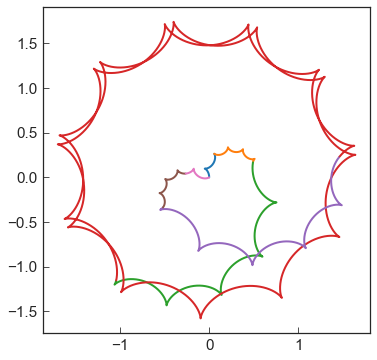

In [129]:
u  = result.x[0]
Tss = result.x[1:1+N_Semi]
Ampss = result.x[1+N_Semi:1+2*N_Semi]
phases0 = np.zeros(len(Ampss))
ion_amps.setSemiSegments(Tss,Ampss,phases0)

plt.figure(figsize=(6,6))
plot_traces(ion_amps.f_alpha_x(u,ion_i,ion_j,-1,phi0=np.pi/2))
plt.gca().set_aspect('equal', adjustable='box')

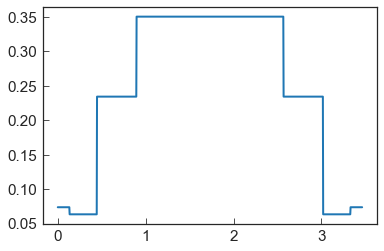

In [124]:
t, y,phase = ion_amps.f_modulation()
t=t/1e-6
plt.plot(t,y)

In [130]:
result.x

array([3.39844938e+07, 1.34117132e-07, 3.10989994e-07, 4.49236317e-07,
       1.67515261e-06, 7.36672160e-02, 6.33851803e-02, 2.34211066e-01,
       3.50321212e-01])

In [132]:
u0

## 100 离子

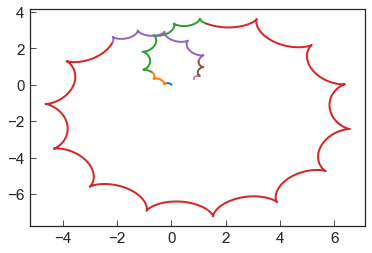

In [141]:
# dipole on the ion_i and ion_j, then calcaulate the phase gate of the two ions

N_ions = 100
dipole_strenth = 20
ion_i = 50
ion_j = 51
v0 = 2*np.pi*100e3    # v_z = 200Kz
beta=23.0

DipoleList = [(ion_i, dipole_strenth),(ion_j,dipole_strenth)] # dipole laser on the ion_i and ion_j
IonChainSetting = IonChain(N_ions,beta,v0,DipoleList)
IonChainSetting.Omega_SDF =  70e6 *2 *np.pi # SDF induced Rabi


ion_amps = Ion_Gate(IonChainSetting)


delta = 2*np.pi*0.5e6    # drive detuning
u0= np.average(IonChainSetting.vs_x[-2:])+ delta
T0 = np.array([0.08,0.2,0.5,1.3])*2*np.pi/delta/1.5 #
A0 = np.array([0.05,0.1,0.2,0.5])
phases0 = np.zeros(len(A0))

N_Semi = len(T0)   # total segments is 2*N_semi-1

ion_amps.setSemiSegments(T0,A0,phases0)

print(min(IonChainSetting.vs_x/2/np.pi/1e6),max(IonChainSetting.vs_z/2/np.pi/1e6))
# plt.plot(*ion_amps.f_modulation())
plot_traces(ion_amps.f_alpha_x(u0,ion_i,ion_j,-1))

In [144]:
def cal(x):
    u = x[0]
    Tss = x[1:1+N_Semi]
    Ampss = x[1+N_Semi:1+2*N_Semi]
    phases0 = np.zeros(len(Ampss))
    ion_amps.setSemiSegments(Tss,Ampss,phases0)
    return ion_amps.optimize_value(u,ion_i,ion_j) # Raman laser also on the ion_i and ion_j

p0 = np.concatenate(([u0],T0, A0))
result = minimize(cal,p0,method = 'Nelder-Mead',tol=1e-5,
                        options={'xtol': 1e-9,'disp': True,
                                'maxiter':10000})

1.1834565167284894 1.6319433759350253 0.1664494411672619
0.06440078258813531 1.330146798190702 0.4856147693539823
1.1814216803720972 1.6305652013032097 0.16649362498665976
1.150323141646353 1.3735755392004607 0.16617962471019876
1.5702343957534186 0.6952959456031904 0.16757654285577228
0.8272981800776833 3.5557028307268355 0.16107648729110036
1.1905415337094687 1.5714245188044051 0.16639711820039604
1.2495321774244474 1.5280127580599692 0.16712002637771928
1.131451378485181 2.9312823986907564 0.17211556586787236
1.3946136252514458 1.2028480266391486 0.09632676825383424
2.2669925978822487 0.0032737278202016667 0.28250040649104147
1.8166047018965683 0.7566248347516776 0.2937000370988043
1.9793486646876572 0.7102317546891391 0.31584571797944516
1.3682795540708006 1.5109634591324113 0.2126017987452995
3.263487985614632 0.6892581724209124 0.3813129178019521
2.0359608630940413 0.6007020252931499 0.41515866795120626
2.652035369874855 1.075059274827837 0.3817768697826862
2.890012445621788 1.35

0.012688749531171028 0.10648401676384306 0.4104305082581474
0.009042597564452547 0.0965209886605905 0.4103114750331711
0.02174949515157838 0.08437705782017918 0.4076636219505785
0.00393099971256569 0.15613858271649295 0.3910849323034453
0.0028172548030697933 0.10726867768637627 0.41930685497173936
0.03688735396685981 0.08795514663960119 0.4168577584594457
4.35094343998804e-05 0.11841100076550866 0.4090123319465091
0.02382540451996691 0.08003335726501833 0.41858873330649526
0.011625821138670125 0.10119525102569424 0.4108984550197219
0.0037426980007963543 0.12107056041601139 0.3947791727334389
0.044367166692467416 0.07730894136554439 0.40973999262003513
0.025318756235555913 0.1014023007381103 0.41275192320233156
0.006802480961449593 0.10503132276566557 0.4082174473434632
0.0006429944643643484 0.12420993070628196 0.40964898529138605
0.02309383833948543 0.0877059486301881 0.4097228431691802
0.007216339606722784 0.09622145578768096 0.4083825289009111
0.005552392610397173 0.09869702376690423

0.000430605350269977 0.005249336323758603 0.4366147212227416
0.0007869109099361579 0.005871435434765941 0.4354379120262335
0.0019605011329081497 0.005913125771684969 0.4348666942408128
0.0015182742795419066 0.00759647198577346 0.43357381483376667
0.0003737801867778569 0.00439492964748611 0.4375697066768991
0.0011360789304120445 0.005374992594661388 0.4359057070311563
7.945118746338613e-06 0.004240782452306752 0.43872450828689136
0.0008341271872219533 0.006437230755886659 0.4348685401299859
0.0009615562409821234 0.004511937433822417 0.43863307275215657
0.00026788572770962144 0.006671659243084679 0.4350724096940608
0.0008611052761538481 0.00791480377613786 0.43345862463027895
0.0010653213010349616 0.007524465855576501 0.433447183262774
0.00014193814193782644 0.007908398490439885 0.43440284430831166
0.0008038944741229181 0.005665753091566025 0.4355740271771493
0.0008606060474950757 0.0093578535626 0.4323914072369375
0.00046468599522563384 0.005248555570266423 0.43628333147799747
0.0023250

0.001242561719501654 0.007079614465832837 0.42588126990198827
0.0019217844321366673 0.009707268623137755 0.4233025468565712
0.0015554094826009874 0.007976508444944387 0.4236124333329725
0.0015477027549058468 0.011466018631885545 0.42251726698433156
0.0013051768788243927 0.007294139834456125 0.4222957085655805
0.0013670082529606792 0.007615975285500979 0.4193695080818456
0.0022314571340925405 0.01968857978068256 0.4182979154893358
0.0008794408275578677 0.007364564912122101 0.4266196074578543
0.0024911688881997197 0.015508035656316447 0.4203035511377946
0.0008560557622204327 0.0075645002814656685 0.4256324520903787
0.0009431335590588618 0.0076187945032278334 0.4259425425131793
0.0016413607195844692 0.008149264310695419 0.423879054238145
0.0006428171504974862 0.009316180162040272 0.42546621826817965
0.0015461335098607039 0.00779112800001678 0.42391484711567085
0.0017197142160100068 0.007054433348834032 0.42160233588017615
0.0005841130447750385 0.0070384330115072615 0.4226632879128074
0.00

0.0011846125912640087 0.012072135641232868 0.35453362878122885
4.247867154283429e-05 0.00803920149936346 0.3566382211042294
2.3479226836343987e-06 0.008026356228274818 0.3477604912675316
0.006735695802957741 0.04308830912209553 0.33273795928636485
0.0003702231740241503 0.015726121955043932 0.3397704649155129
0.0011601202394150296 0.01305749225872027 0.3479997593311337
0.0014179229744592625 0.030443359619178822 0.33409234661035025
0.002927291910058328 0.053941206268286246 0.3300118642518184
0.0002924212264635504 0.008492510979666627 0.3590354817220627
0.001439655877463475 0.0174378687657251 0.3405506594268415
0.0024454792070059727 0.02964415068949184 0.33648503206036207
0.0004050229029408999 0.007600369683545081 0.3532182505740904
0.002080193960629915 0.03347897107646779 0.33456020626505545
0.0002033590169225466 0.007650915651345941 0.35310784190871924
0.0016192473290271596 0.01865862320924516 0.3389250667500887
2.5918690824072695e-05 0.008859686400545103 0.36015915693633627
0.000220054

0.0006169011881345485 0.010410263106741847 0.3406863364871411
0.0005213186388549166 0.009923810818799776 0.3411240965995601
0.0005598007798121657 0.011639579779670822 0.3396333678035246
0.0005129365915038033 0.011454357007469322 0.33954886705356824
0.0003907849406631942 0.011923996986542538 0.33894938606177316
0.0006239590983435188 0.010817954978717115 0.3401330427177127
0.0003197272436229235 0.011679752864920599 0.33953082818809843
0.000693973158909896 0.011226405075926517 0.33942955185731716
0.0007070599808430255 0.011098818835675577 0.3394065505535009
0.0008271181172314185 0.011097505701273016 0.338996538434432
0.00031031756135209215 0.011438637574576775 0.33929742525193785
0.000366428497520758 0.010609672679787345 0.34026794972799745
0.00046342365373692156 0.010421772055813606 0.33992754927305224
0.00040829852314945304 0.009950871109749623 0.34007439684405494
0.0003077894118738951 0.010955902536824325 0.33922432652576173
0.00030254060088536286 0.010997491979932477 0.339178151200452

0.008572529720711465 0.031770961517393496 0.24434732045162644
0.0349109184566649 0.028669986388910607 0.21508560845605285
0.04657358065727919 0.03547874696203732 0.19708590741066967
0.03238175730282701 0.03205482483704658 0.21184344121485577
0.038328370892464485 0.0439620594157842 0.19427287148805572
0.01992328970233796 0.041477589220209436 0.21694869472804879
0.027592482971474347 0.0486409552911389 0.20255300407568466
0.008583187111593522 0.03608981317544327 0.23416608964724883
0.017658993430798166 0.03179576986418935 0.2275616108683236
0.023479194751035035 0.05631000614475033 0.20246376903110086
0.022483485589135252 0.04282716930238122 0.21248232620334573
0.02957723776361832 0.037762886261814385 0.2064999293889569
0.03855829952143956 0.04380491830982758 0.19252639772963942
0.016288340219014437 0.03880865415270492 0.21638074062566925
0.011188813695857574 0.04416473428167009 0.21421360691418823
0.028409760480135358 0.057627070381888516 0.19204647861566837
0.0504489214493569 0.040628737

0.07944289771582466 0.10152571398238314 0.028583294533564008
0.025664513408895525 0.15222559410276648 0.02446511393968631
0.050265948775924954 0.13830571498687994 0.00402113884797739
0.0616847690679975 0.1416763395379706 0.016117721078328096
0.03362448937179521 0.11438440784885645 0.05255089615878017
0.019363601612136638 0.15577658044106563 0.02064812344765965
0.017209923103262165 0.1508613024517725 0.02731597649483586
0.028460852995864358 0.12832344350210526 0.033577130508223085
0.02587803479161918 0.12104892904069231 0.040077996485780254
0.037569360793067746 0.11683417235999943 0.03312416018215725
0.041066290289190385 0.13081730364132138 0.014337907691728269
0.050235499952308714 0.1320155044831987 0.0006182351143619869
0.018040784944995718 0.16335659617660536 0.010392287456812532
0.02528850707637262 0.17797388154924199 0.015163200416393074
0.032469956418336554 0.12571631352656482 0.035950324309896864
0.03692460230353328 0.12748335837547245 0.018455581069221516
0.04299689795830493 0.1

0.001037602605334665 0.0020467631174917013 0.0007887179527985566
0.001051222720685374 0.0022067892102633135 0.002866323288924555
0.001380299447160681 0.004175593871827404 0.0021741776733934515
0.000918944112044812 0.0015949618290787958 0.0022577130482259733
0.001797940633829971 0.0019994102194123026 0.0006301595612425714
0.0006001181275309007 0.0034146785728225238 0.0006140535328684749
0.0007036074387440994 0.0023746728077853442 0.0019038626043910156
0.000771219312863254 0.0028582661743071737 0.0016869841559499221
0.0009926079141582157 0.0020266679360385204 0.0008159485569931846
0.001328554431665946 0.0017318763137467174 0.002462969730347986
0.0008078609522042321 0.002173636572312046 0.0008083277241839326
0.0009451682498647808 0.003043598210938096 0.0023773071062551665
0.000926263788213463 0.001784176474460486 0.0011016361893352311
0.0006328810513009659 0.0046207167163141325 0.000675383711995714
0.0013281084672838342 0.0018477855793695842 0.0001960313613524889
0.0017760438768661749 0.0

0.000585716907157642 0.001630249894461196 3.634872003388523e-07
0.000643537152318087 0.0016153694274353707 1.1963844625206832e-05
0.0005808126784636468 0.0016311970286501257 8.349835854737364e-06
0.0005821353584342843 0.0016261863641491667 4.731862975670964e-05
0.0005856679291134429 0.001622618486089319 1.3492861183017624e-05
0.0005896639472852779 0.0016271712201830417 2.884060893126872e-05
0.0005823084434964579 0.0016254331218393736 1.704564353399718e-05
0.0005803210711692471 0.001627797506372984 4.458303228016547e-05
0.0005879023733531616 0.0016201973808181872 1.17695295900333e-05
0.0005916378581077625 0.001621676601895809 2.978281713428288e-05
0.0005822875228196861 0.0016240789916836017 1.784545723904074e-05
0.0005808271087499689 0.001628737896618247 2.8408409133540147e-05
0.0005815359836027489 0.0016256611571651763 1.3827896450102628e-05
0.0005851993397041495 0.001624473299132702 3.228236647867533e-05
0.0005828491156349249 0.0016242679587695182 1.2778232840737758e-05
0.000581214631

0.0005828768128288094 0.0016234423191393691 2.667895868668779e-07
0.0005828424206602497 0.0016234785504656854 9.454479954484896e-08
0.0005828721973042133 0.0016234607189741495 2.324037469136897e-07
0.0005828455950181015 0.0016234720055782058 1.0340669387431944e-07
0.0005828134636347343 0.0016234953766256668 2.3913219404647634e-07
0.0005828682791189683 0.0016234554810057285 8.333878742661227e-08
0.0005830602662727918 0.001623281261939083 2.1971066832549013e-07
0.0005827781760778173 0.0016235342913719186 9.810051704306488e-08
0.000582816978549144 0.0016234992814514783 2.0592242133687932e-07
0.000582877101085118 0.0016234451145023662 7.102903243350056e-08
0.0005826812674962034 0.0016237244269327548 1.5842218470396574e-07
0.000582924738181701 0.0016234059492377406 4.108779894096415e-08
0.0005828258822144396 0.0016234938158387682 1.3126557707465736e-07
0.0005828371940727855 0.001623481675882187 6.30983949534425e-08
0.0005828934699197174 0.001623427573918603 1.546219978720842e-07
0.000582830

0.0005828584209562292 0.0016234591971427072 6.5044769570477e-10
0.0005828539559215534 0.0016234635681846585 1.2080816347292966e-09
0.0005828585084833643 0.0016234591222139497 1.5365886341101032e-09
0.00058285671216636 0.0016234609291935296 6.623563919561093e-10
0.0005828573535518836 0.0016234602546462843 1.5717036561113673e-09
0.0005828572137368491 0.001623460433384749 5.750022680217626e-10
0.000582856746210274 0.0016234608635601398 1.3675558463432935e-09
0.000582857440951161 0.001623460205354025 5.913110001642963e-10
0.0005828576393275128 0.0016234599078361835 1.2547927141781656e-09
0.000582857084594357 0.0016234605842626532 4.6125325781076754e-10
0.000582861281068588 0.001623456511702663 1.3575176538438427e-09
0.0005828557862809864 0.0016234617933551332 5.66660496303939e-10
0.0005828565426660215 0.001623461141856384 1.1873337868451017e-09
0.0005828577583203395 0.0016234598624997316 4.46232384376799e-10
0.0005828562508687113 0.0016234612835951574 9.319647276129217e-10
0.00058285780921

0.000582857209800638 0.001623460414589716 1.900257728948418e-11
0.0005828571800007367 0.001623460444831431 3.933742220851855e-12
0.0005828571719643397 0.0016234604517585444 2.0182078230845946e-11
0.0005828571951137192 0.0016234604299395078 3.2374103398069565e-12
0.0005828571396233719 0.0016234604867861279 7.600142737373972e-12
0.0005828572201513795 0.001623460407022756 1.213340539152341e-11
0.0005828571645033354 0.0016234604596672103 6.681766251404042e-12
0.0005828571810966199 0.0016234604448868422 1.1763923168928159e-11
0.0005828571812336333 0.0016234604435079558 5.587530438333488e-12
0.0005828571376309301 0.001623460485801372 1.2167156171472016e-11
0.0005828571574317957 0.0016234604667628755 6.88071821741687e-12
0.0005828571806767684 0.0016234604447600718 7.827516412817204e-12
0.0005828572209912198 0.0016234604022642893 1.0021317109476513e-11
0.0005828572006494842 0.0016234604233898672 5.516476164757478e-12
0.0005828571843757274 0.0016234604395296264 1.2920331471377722e-11
0.00058285

0.0005828577355068121 0.0016234598364482402 1.247890679678676e-12
0.0005828578032977079 0.0016234597639012073 5.853095785823825e-13
0.0005828578362412764 0.0016234597264883645 1.7319479184152442e-13
0.0005828580131609941 0.0016234595347569564 3.1530333899354446e-13
0.0005828578754486717 0.0016234596830316283 7.558398351648066e-13
0.000582857940344316 0.0016234596145677824 9.920952948050399e-13
0.0005828579952470544 0.0016234595539158622 9.920952948050399e-13
0.0005828580871594073 0.0016234594566090312 2.001065979584382e-12
0.0005828583410470158 0.0016234591848842746 3.848477092560643e-12
0.0005828581770267796 0.001623459360880986 1.802114013571554e-12
0.0005828582466198631 0.0016234592848027923 3.0109248427834245e-13
0.0005828583089573093 0.0016234592179323079 1.2523315717771766e-13
0.0005828585956917031 0.001623458911769147 5.284661597215745e-13
0.0005828584172529403 0.00162345910096353 1.759481449425948e-12
0.0005828585480897842 0.0016234589615548463 1.873168287147564e-12
0.000582858

0.0005828612625382141 0.0016234561535456238 2.673417043297377e-13
0.0005828607124295386 0.0016234567046346086 3.2951419370874646e-13
0.0005828609727524212 0.0016234564412637407 7.132072710192006e-13
0.0005828609299790727 0.00162345648099534 1.2247980407664727e-12
0.0005828610995348591 0.0016234563130164174 6.279421427279885e-13
0.0005828608958640524 0.00162345651548526 5.799805080641818e-13
0.0005828607795591722 0.0016234566279522396 1.219468970248272e-12
0.0005828609405323472 0.0016234564695858811 8.268941087408166e-13
0.0005828610927473943 0.0016234563172692201 1.0542677841840487e-12
0.0005828610062436776 0.0016234564017359127 3.5793590313915047e-13
0.0005828610113810817 0.0016234563921431638 4.858335955759685e-13
0.0005828613562222666 0.0016234560527206888 4.858335955759685e-13
0.0005828611572854012 0.0016234562467613777 1.0542677841840487e-12
0.000582860863607712 0.0016234565382365117 1.5090151350705128e-12
0.0005828606641507322 0.0016234567310844826 2.290612144406623e-12
0.0005828

0.000582584144882767 0.0016237240406540322 3.871436504709891e-10
0.0005825600970875643 0.001623748664691984 4.5711789908864375e-10
0.0005825141849690522 0.0016237968814989605 6.115756789881743e-10
0.0005826637940343389 0.0016236444687902864 1.8409895830018286e-10
0.0005826906548085641 0.0016236184401993167 1.3463097303656468e-10
0.0005825923073190706 0.001623715981275269 3.56888740782324e-10
0.0005825945371673669 0.0016237131932904279 3.6402258984935543e-10
0.0005826507010840236 0.0016236572308575697 2.1172485986653555e-10
0.000582611126610777 0.001623696273750064 3.164730699722895e-10
0.000582600560822929 0.001623706419615054 3.552260707806454e-10
0.0005826179186069897 0.0016236892114745998 3.058433506453184e-10
0.0005825831746710566 0.001623723985744006 4.126805563942071e-10
0.00058263776716589 0.0016236693227936422 2.589475300851518e-10
0.0005826580883243489 0.0016236492095760837 2.0966428593283126e-10
0.000582577373012374 0.0016237296058111417 4.376774498382474e-10
0.00058257405062

0.0005826080751173814 0.0016236982586646182 3.5703084932947604e-10
0.0005826071253731951 0.0016236992064300464 3.5862246505757867e-10
0.0005826099438381485 0.001623696396246579 3.5056491043405913e-10
0.0005826070078758826 0.0016236993223224137 3.610951537780238e-10
0.0005826102165212754 0.001623696123667567 3.505222778699135e-10
0.0005826075310259928 0.0016236988005338614 3.5846614565571144e-10
0.0005826062422483751 0.0016237000860788455 3.6147884685533427e-10
0.0005826067911145742 0.0016236995392386925 3.5936142950276917e-10
0.0005826051815580543 0.001623701146151168 3.6258729352312e-10
0.0005826088048599426 0.001623697530530971 3.530660208639347e-10
0.0005826093181750483 0.0016236970188818734 3.5005331966431186e-10
0.0005826058754745308 0.001623700452289197 3.617346422402079e-10
0.0005826068905266633 0.0016236994402012632 3.574429641162169e-10
0.0005826086484453695 0.0016236976872633772 3.516591462471297e-10
0.0005826077364598603 0.0016236985960363939 3.5350655736010594e-10
0.0005826

0.0005826029735180735 0.0016237033707364717 2.27062812996337e-11
0.0005825974296987575 0.001623708930222381 2.134203924697431e-11
0.0005826080687760638 0.0016236982786295819 4.5501380441237416e-12
0.00058260985476835 0.0016236964939130571 1.84341431008761e-11
0.0005826005842851304 0.0016237057649486019 9.737100015172473e-12
0.000582596340475434 0.0016237100050371348 2.3374191471248196e-11
0.0005826114779509649 0.001623694879403539 7.818634628620202e-12
0.0005825974670520669 0.0016237088717013207 2.708322455191592e-11
0.000582604745783022 0.001623701599213439 2.4829027722717e-11
0.0005825999402249344 0.001623706391511155 1.6794565738109668e-11
0.0005825963151263246 0.001623710014757747 2.993960634967152e-11
0.0005826013255724638 0.0016237050115951914 4.2388315080188477e-11
0.0005826038904145787 0.0016237024522184464 8.046008304063434e-12
0.0005826114245877693 0.0016236949336311717 1.2181367026187218e-11
0.0005826001057738878 0.001623706234964774 1.4364509581810125e-11
0.0005826041386840

0.0005825995360954363 0.0016237067926273684 1.7319479184152442e-13
0.0005825986010600452 0.0016237077278620229 1.5365486660812167e-13
0.000582598462909158 0.0016237078661799106 3.241851231905457e-13
0.0005825997924813816 0.0016237065362687416 1.687538997430238e-14
0.0005826003624149463 0.0016237059665924832 2.1049828546892968e-13
0.0005825990413085846 0.0016237072874202732 9.681144774731365e-14
0.0005825993459167962 0.001623706982781962 3.7214675785435247e-13
0.0005825994709178332 0.0016237068577600764 1.1102230246251565e-13
0.0005825997868313224 0.001623706541997548 2.957634137601417e-13
0.0005825993049136744 0.001623707023785976 4.529709940470639e-14
0.0005825998668292441 0.0016237064619100613 2.8688162956314045e-13
0.0005825992977288067 0.0016237070309460915 4.0945025148175773e-13
0.000582599548687996 0.0016237067800016322 5.417888360170764e-14
0.0005825993879145073 0.0016237069407670853 1.1102230246251565e-13
0.0005825993217968314 0.0016237070068887021 8.260059303211165e-14
0.00058

0.0005825993740999534 0.0016237069545830588 1.1546319456101628e-14
0.0005825993734385924 0.0016237069552448055 3.9968028886505635e-14
0.0005825993705735814 0.0016237069581090044 6.838973831690964e-14
0.0005825993699763426 0.0016237069587062116 5.950795411990839e-14
0.0005825993739018473 0.001623706954781246 8.79296635503124e-14
0.0005825993745291023 0.001623706954153694 7.37188088351104e-14
0.0005825993738839195 0.001623706954799869 1.1546319456101628e-14
0.0005825993735727837 0.001623706955111002 8.260059303211165e-14
0.0005825993726382831 0.0016237069560445438 8.79296635503124e-14
0.0005825993729541205 0.0016237069557291093 4.529709940470639e-14
0.0005825993728293894 0.001623706955855027 1.5898393712632242e-13
0.0005825993733870058 0.0016237069552978314 1.1102230246251565e-13
0.0005825993738321439 0.0016237069548518264 1.4477308241112041e-13
0.0005825993737244347 0.001623706954959567 3.9968028886505635e-14
0.0005825993735014249 0.0016237069551802304 1.7319479184152442e-13
0.000582599

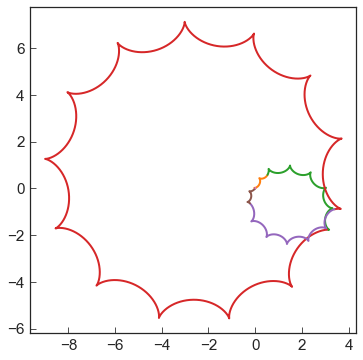

In [145]:
u  = result.x[0]
Tss = result.x[1:1+N_Semi]
Ampss = result.x[1+N_Semi:1+2*N_Semi]
phases0 = np.zeros(len(Ampss))
ion_amps.setSemiSegments(Tss,Ampss,phases0)

plt.figure(figsize=(6,6))
plot_traces(ion_amps.f_alpha_x(u,ion_i,ion_j,-1,phi0=np.pi/2))
plt.gca().set_aspect('equal', adjustable='box')

## 改变离子间距，优化

In [ ]:
# dipole on the ion_i and ion_j, then calcaulate the phase gate of the two ions

N_ions = 100
dipole_strenth = 20
v0 = 2*np.pi*100e3    # v_z = 200Kz
beta=23.0


ion_i = 40

data = []
for ion_j in range(40,61):
    DipoleList = [(ion_i, dipole_strenth),(ion_j,dipole_strenth)] # dipole laser on the ion_i and ion_j
    IonChainSetting = IonChain(N_ions,beta,v0,DipoleList)
    IonChainSetting.Omega_SDF =  70e6 *2 *np.pi # SDF induced Rabi

    ion_amps = Ion_Gate(IonChainSetting)
    
    
    v1,v2 = IonChainSetting.vs_x[-2:]
    print((v2-v1)/2/np.pi)
    delta = 2*np.pi*0.5e6    # drive detuning
    u0= np.average(IonChainSetting.vs_x[-2:])+ delta
    T0 = np.array([0.08,0.2,0.5,1.3])*2*np.pi/delta/1.5 #
    A0 = np.array([0.05,0.1,0.2,0.5])
    phases0 = np.zeros(len(A0))

    N_Semi = len(T0)   # total segments is 2*N_semi-1

    ion_amps.setSemiSegments(T0,A0,phases0)

    p0 = np.concatenate(([u0],T0, A0))
    result = minimize(cal,p0,method = 'Nelder-Mead',tol=1e-5,
                            options={'xtol': 1e-9,'disp': True,
                                    'maxiter':10000})
    d = ((ion_i,ion_j), result, ion_amps.dR2,ion_amps.dalpha2,ion_amps.G_phase)
    print('---------------------------------')
    print((ion_i,ion_j))
    print(result)
    data.append(d)

# print(min(IonChainSetting.vs_x/2/np.pi/1e6),max(IonChainSetting.vs_z/2/np.pi/1e6))
# # plt.plot(*ion_amps.f_modulation())
# plot_traces(ion_amps.f_alpha_x(u0,ion_i,ion_j,-1))

# f = open('100 ion i=30,j=31-70,optimize.pkl','wb')
# pl.dump(data,f)
# f.close()

1342256.6864104215


# 相位优化